# Gaussian Regression Processes

In this notebook, regression problems are tried and solved using the GP regression method.

In [1]:
from GaussianProcesses import *
from Kernels import *


import warnings
warnings.simplefilter("error")
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)
from tqdm import tqdm_notebook

%matplotlib inline

In [2]:
def f(X, *C, noise = 0.02):
    c1,c2,c3,c4 = C
    return -c1*np.sin(c2*X) - X**2 + c4*X + noise*np.random.randn(*X.shape)


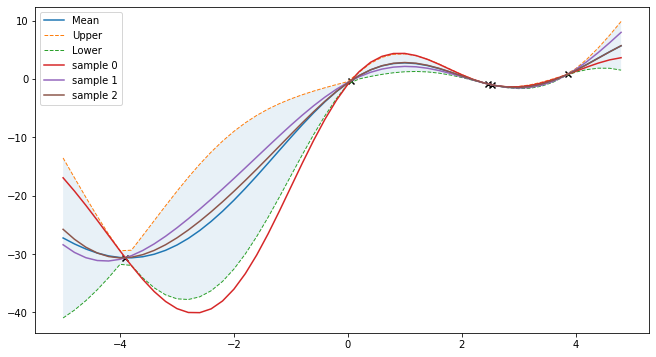

In [3]:
def nan_checker(covariance_matrix):
    diag_part = np.diag(covariance_matrix)
    diag_part_copy = diag_part.copy()
    diag_part_copy[diag_part < 0] = 0
    diag_part = diag_part_copy
    std = np.sqrt(diag_part)
    return std

def plot(mu_s, cov_s, X, X_train, Y_train):
    plt.figure(figsize=(11,6))
    samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)

    std = nan_checker(cov_s)
    
    uncertainty = (1.96 * std).ravel()
    upper,lower = mu_s.ravel()+uncertainty,mu_s.ravel()-uncertainty


    plt.plot(X, mu_s, label = 'Mean')
    plt.plot(X, upper,label='Upper',lw=1, ls='--')
    plt.plot(X, lower,label='Lower',lw=1, ls='--')

    plt.fill_between(X.flatten(), upper, lower, alpha=0.1)

    for i,sample in enumerate(samples):
        plt.plot(X, sample, label = 'sample '+str(i))
    plt.scatter(X_train.flatten(), Y_train.flatten(),marker = 'x', color = 'black',  linewidths=30)
    plt.legend()
    plt.show()
    return samples, std, uncertainty, upper, lower
    
kernel = SquareExponential()

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)

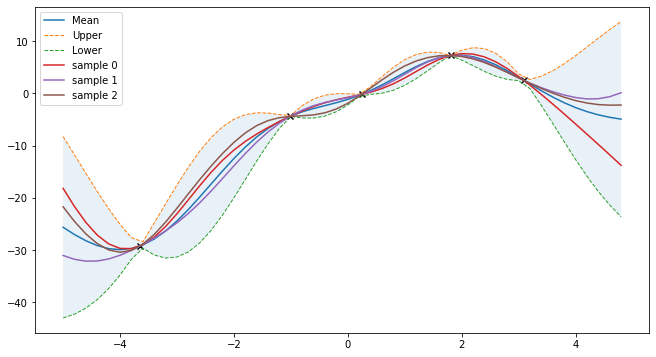

In [4]:
kernel = RationalQuadraticKernel()

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
    
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)

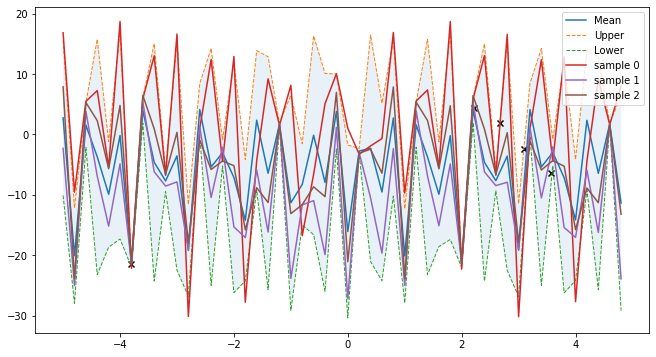

In [5]:
kernel = PeriodicKernel()
X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
    
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)


In [6]:
# 2D plot

In [7]:
p = 3
noise = 0.1
X_train = np.random.uniform(-4, 4, (100, p))
Y_train = 0.5*np.linalg.norm(X_train, axis = 1) + noise*np.random.randn(len(X_train))

X = np.random.uniform(-4, 4, (10, p))

kernel = SquareExponential()
gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, std_s = gpr.predict(X, return_std = True)

In [8]:
mu_s

array([2.18029536, 2.3864389 , 1.98107092, 1.43292768, 2.59889537,
       2.06214076, 1.67156667, 2.63863209, 1.82096112, 2.46000843])

In [9]:
std_s

array([0.39150962, 0.11953865, 0.30584132, 0.14186315, 0.1482199 ,
       0.52650771, 0.16391275, 0.18720676, 0.13355995, 0.15609933])

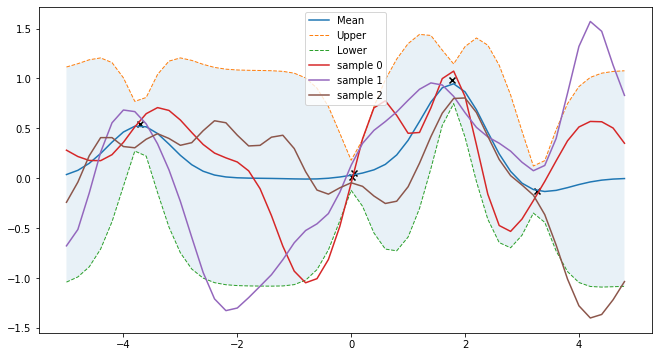

In [11]:
#eyeball comparison with sklearns implementation

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
Y_train = np.sin(X_train)

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GPR(kernel=rbf, alpha=noise**2)

gpr.fit(X_train, Y_train)

mu_s, cov_s = gpr.predict(X, return_cov=True)


l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

res = plot(mu_s, cov_s, X, X_train, Y_train)
